<a href="https://colab.research.google.com/github/satria080503/MachineLearning_Ganjil2023/blob/main/Jobsheet4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB WORK 1

MULTINOMINAL NAIVES BAYES MODEL

    Steps 1 - Creating Dummy Data

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Create dummy data
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# By default, make_classification function produce features in floating point
# In this case, we want to make it as integer value

# Convert to absolute point
X = np.absolute(X)

# Round to 2 decimal place
X = np.round(X, 2) * 100

# Convert to interger
X = X.astype(int)
print(X)
print(y)

[[ 79  55]
 [ 83  61]
 [ 96  48]
 [ 79  97]
 [ 89  36]
 [112 225]
 [ 91  33]
 [110 194]
 [147 117]
 [ 49  97]
 [120 167]
 [ 63  17]
 [171 239]
 [107  98]
 [ 28 127]
 [ 41  71]
 [163 108]
 [102  71]
 [117  50]
 [ 46  53]
 [ 49 182]
 [ 73  87]
 [ 11 126]
 [198  33]
 [153  64]
 [ 77 115]
 [221  17]
 [175  49]
 [110  93]
 [ 80 113]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


(Optional) Creating DataFrame

In [ ]:
import pandas as pd

# We need to reshape the label 'y' to 2d array
y_new = y.reshape(len(y), 1)

# Concatenate features and labels
data = np.concatenate((X, y_new), axis=1)

# Create a list of columns name
nama_kolom = ['Feature 1', 'Feature 2', 'Label']

# Create Pandas DataFrame
df = pd.DataFrame(data, columns=nama_kolom)

# Check DataFrame
df.head()

,Feature 1,Feature 2,Label
0,79,55,0
1,83,61,0
2,96,48,0
3,79,97,0
4,89,36,0


    Steps 2 - Convert Label to Categorical Value

In [ ]:
# Define categorical label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Duplicate DataFrame
df_label = df.copy()

# Map new label to encoded label
df_label['Label'] = df_label['Label'].map(labels)

# Check
df_label.head()

,Feature 1,Feature 2,Label
0,79,55,Kelas B
1,83,61,Kelas B
2,96,48,Kelas B
3,79,97,Kelas B
4,89,36,Kelas B


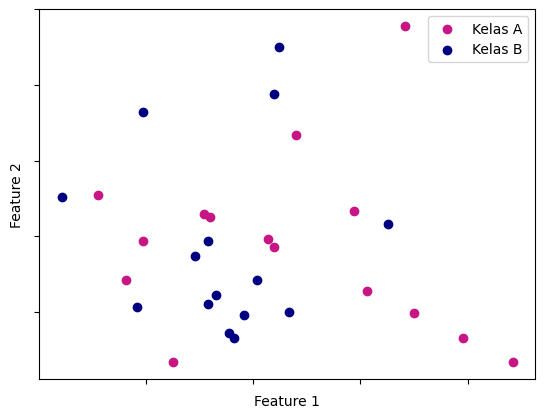

In [ ]:
import matplotlib.pyplot as plt

# Define the color for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Group by Label
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], c=colors['class_a'])
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], c=colors['class_b'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

    Steps 3 - Create Multinominal Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Initiate the MultinomialNB object
mnb = MultinomialNB()

# We can use X and y from data dummy directly

# Split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fitting model
# Label y should be in 1D arraylike form
mnb.fit(X_train, y_train)

# Make a prediction from train data
y_train_pred = mnb.predict(X_train)

# Make a prediction from test data
y_test_pred = mnb.predict(X_test)

    Steps 4 - Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# training accuracy
acc_train = accuracy_score(y_train, y_train_pred)

# testing accuracy
acc_test = accuracy_score(y_test, y_test_pred)

# Model evaluation on accuracy
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.4444444444444444


Gussian Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initiati GaussianNB object
gnb = GaussianNB()

# We will use the training and testing data from previous model

# Fit model
gnb.fit(X_train, y_train)

# Make a prediction using training data
y_train_pred_gnb = gnb.predict(X_train)

# Evaluate training data accuracy
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Make a prediction using testing data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluate testing data accuracy
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print model evaluation
print(f'Train Accuracy (Gaussian): {acc_train_gnb}')
print(f'Test Accuracy (Gaussian): {acc_test_gnb}')

Train Accuracy (Gaussian): 0.7142857142857143
Test Accuracy (Gaussian): 0.5555555555555556


LAB WORK 2

    Steps 1 - Load Data

In [ ]:
import numpy as np
import pandas as pd

# Load data with specific encoding due data doesn't use utf-8 encoding
dataset = 'C:\Machine Learning\week4\spam.csv'
df = pd.read_csv(dataset, encoding='latin-1')

# Check
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


    Steps 2 - Preprocessing

Step 2.1 -  Drop Unecessary Column

In [ ]:
# dt.iloc(:0:1)
# Drop last 3 columns
df = df.drop(df.iloc[:,2:], axis=1)

# Check
df.head()

Step 2.2 - Rename Columns Name

In [ ]:
# Rename "v1" and "v2"
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Do renaming columns
df = df.rename(columns=new_cols)

# Check
df.head()

Step 2.3 - Data Inspection

In [ ]:
# Check data per class
print(df['Labels'].value_counts())
print('\n')

# Check general information
print(df.info())
print('\n')

# Check Descriptive Statistic Information
print(df.describe())

Step 2.4 - Label Encoding

In [ ]:
# Prepare the labels
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode
df['Labels'] = df['Labels'].map(new_labels)

# Check
df.head()

Step 2.5 - Split Features and Labels

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

    Step 3 - Features and Extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initaite CountVectorizer
bow = CountVectorizer()

# Fitting and transform X_train using CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Why just transform? The reason is the same as in the third experiment.
# We don't want the model to know the parameters used by CountVectorizer for fitting the X_train data.
# Thus, the testing data can remain unfamiliar to the model.
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

Training and  Evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initiate MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Make a prediction using training data
y_pred_train = mnb.predict(X_train)

# Evaluate training data
acc_train = accuracy_score(y_train, y_pred_train)

# Make a prediction using testing data
y_pred_test = mnb.predict(X_test)

# Evaluate testing data
acc_test = accuracy_score(y_test, y_pred_test)

# Print model evaluation
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')

Training Accuracy: 0.5238095238095238
Testing Accuracy: 0.4444444444444444


Lab Work 3

Step 0 - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Step 1 - Create Dummys

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Step 2 - Create Decision Boundaries

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Step 3 - Create

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Step 4 - Model Fitting

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

# Initaite SVC object
model = SVC(kernel='linear', C=1E10)

# Fitting
model.fit(X, y)

Step 4.1 - Visualize Fitting Model

In [ ]:
# create a function to plot decision boundary

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Several data points that touch (enter) the area around the line are referred to as support vectors

In [ ]:
model.support_vectors_

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Non-Linear SVM

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))